# Linear Regression multiple ouputs

## Contents

1. Make Some Data
2. Create the Model
3. Train the model: Batch Gredient Descent

In [1]:
# import libraries

import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [2]:
# The function for plot 2D

def plot_2D_plane(model, data_set, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

## 1. Make some Data

In [3]:
# Create a 2D dataset

class Data2D(Dataset):
    
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [4]:
# Create a dataset object

dataset = Data2D()

## 2. Create the model, optimizer, total loss function

In [5]:
# Create a linear regression

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
      
    # Predction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create the model object and print the parameters

model = linear_regression(2, 1)
print("The parameters", list(model.parameters()))

The parameters [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


In [7]:
# Create optimizer

optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [8]:
# Create loss function

criterion = nn.MSELoss()

In [9]:
# Create data loader

dataloader = DataLoader(dataset = dataset, batch_size=2)

## 3. Train the Model: Btach Gradient Descent

Before Training


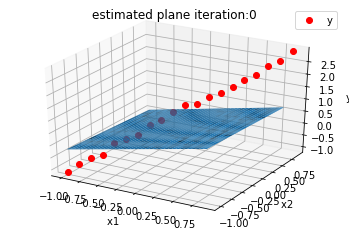

After Training


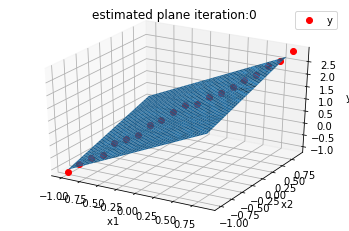

In [10]:
# Train the model

LOSS = []
print("Before Training")
plot_2D_plane(model, dataset)

epochs = 100

def train(epochs):
    
    for epoch in range(epochs):
        iter_loss = 0
        for x, y in dataloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        iter_loss += loss.item()
        LOSS.append(iter_loss)  
train(epochs)
print("After Training")
plot_2D_plane(model, dataset)

Text(0, 0.5, 'Cost/total loss ')

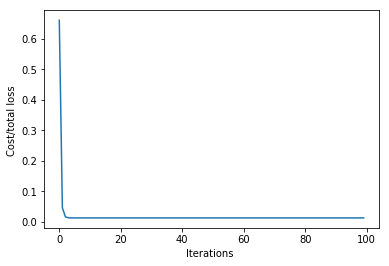

In [11]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [12]:
len(LOSS)

100